<a href="https://colab.research.google.com/github/anshita-21/SIT-ICOE-HACKATHON/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

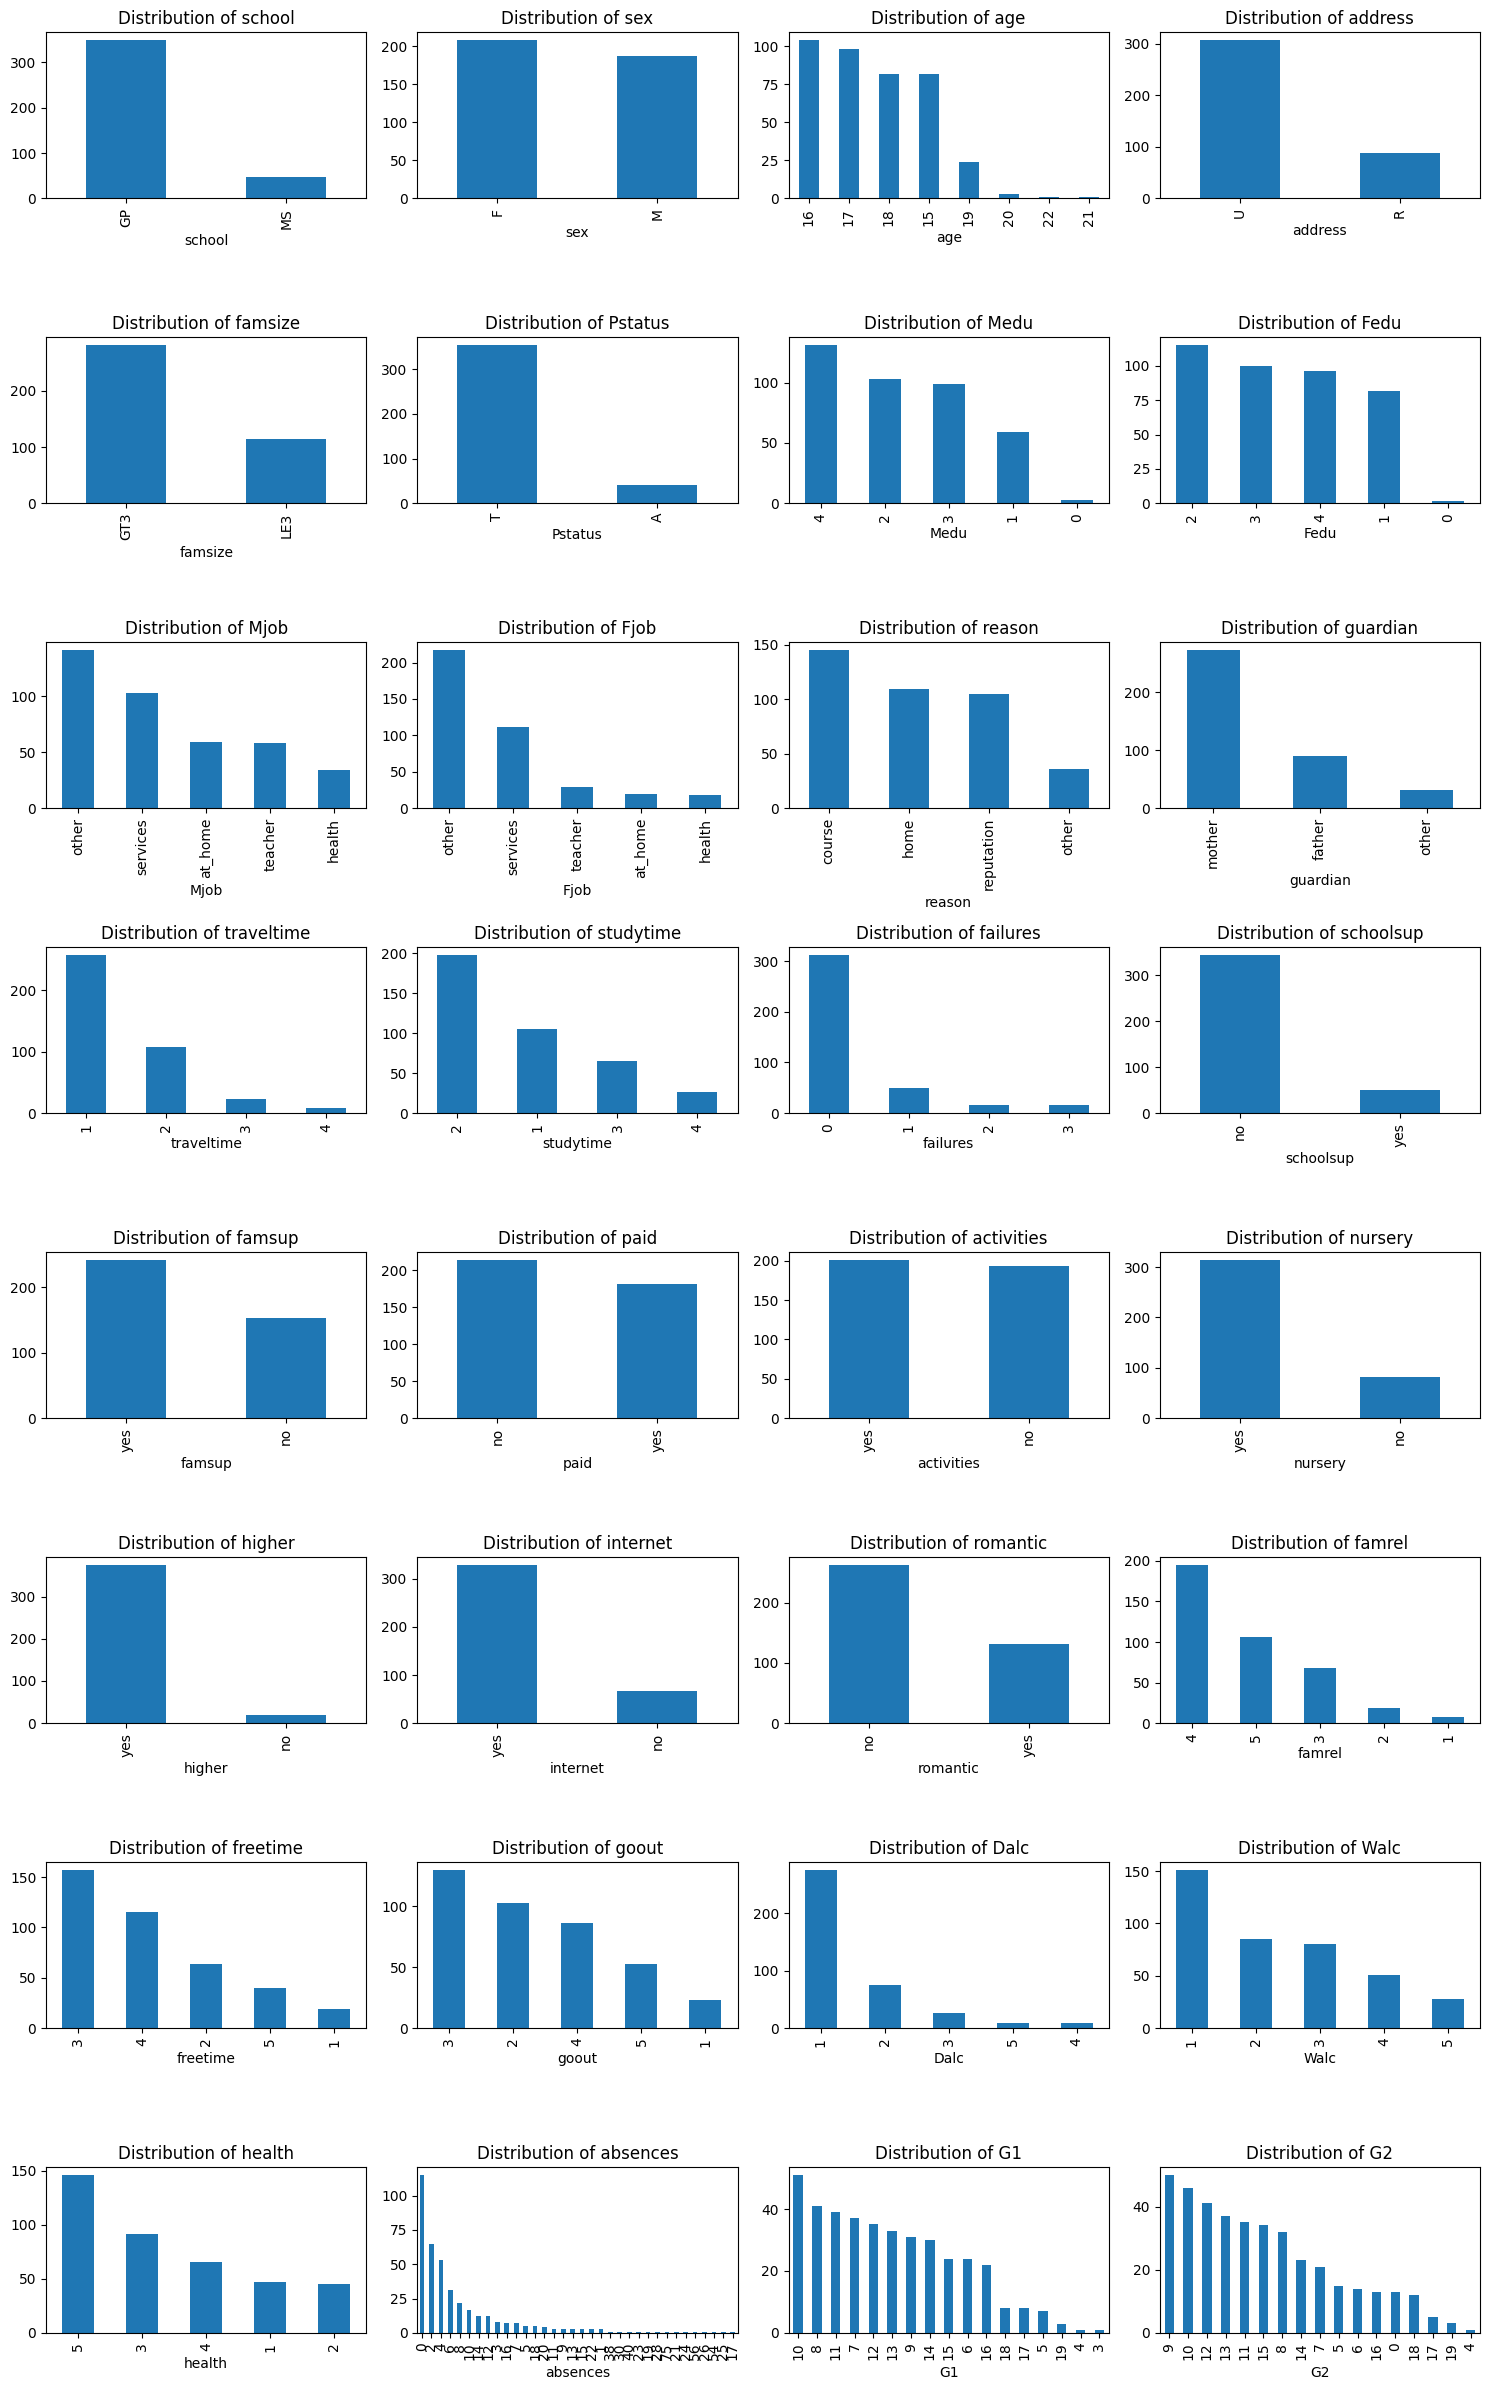

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Remove the target variable "G3" from the list of columns
cols_to_plot = [col for col in data.columns if col != "G3"]

# Create subplots
num_cols = len(cols_to_plot)
cols_per_subplot = 4
num_subplots = (num_cols - 1) // cols_per_subplot + 1
fig, axs = plt.subplots(num_subplots, cols_per_subplot, figsize=(15, num_subplots * 3))

# Iterate over the columns and create the distribution plots
for i, col in enumerate(cols_to_plot):
    ax = axs[i // cols_per_subplot, i % cols_per_subplot]
    data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()


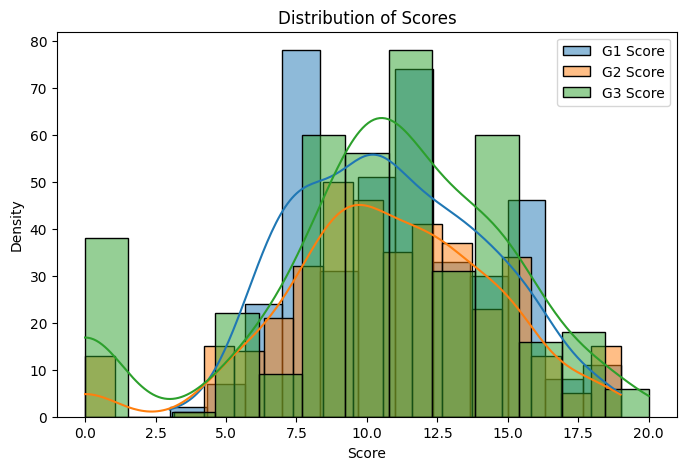

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Distribution plot of G1_y
sns.histplot(data['G1'], kde=True, label='G1 Score', ax=ax)

# Distribution plot of G2_y
sns.histplot(data['G2'], kde=True, label='G2 Score', ax=ax)

# Distribution plot of G3_y
sns.histplot(data['G3'], kde=True, label='G3 Score', ax=ax)

# Set axis labels and title
ax.set_xlabel('Score')
ax.set_ylabel('Density')
ax.set_title('Distribution of Scores')

# Add a legend
ax.legend()

# Display the combined distribution plot
plt.show()


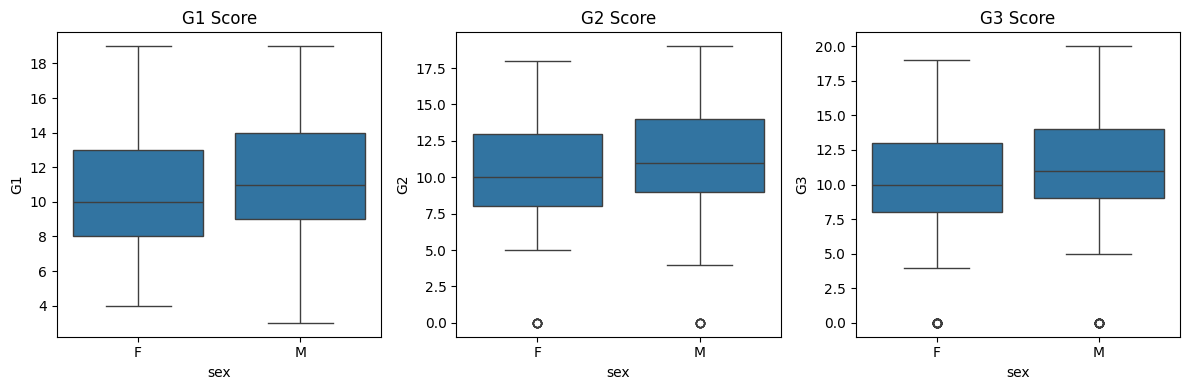

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of G1_x by sex
sns.boxplot(ax=axs[0], x='sex', y='G1', data=data)
axs[0].set_title('G1 Score')

# Box plot of G2_x by sex
sns.boxplot(ax=axs[1], x='sex', y='G2', data=data)
axs[1].set_title('G2 Score')

# Box plot of G3_x by sex
sns.boxplot(ax=axs[2], x='sex', y='G3', data=data)
axs[2].set_title('G3 Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()


In [98]:
import pandas as pd
# checking null values
data = pd.read_csv("student-mat.csv", delimiter=";")
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [99]:
import pandas as pd
# checking null values
data = pd.read_csv("student-por.csv", delimiter=";")
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


mean squared error: 0.7173730060235


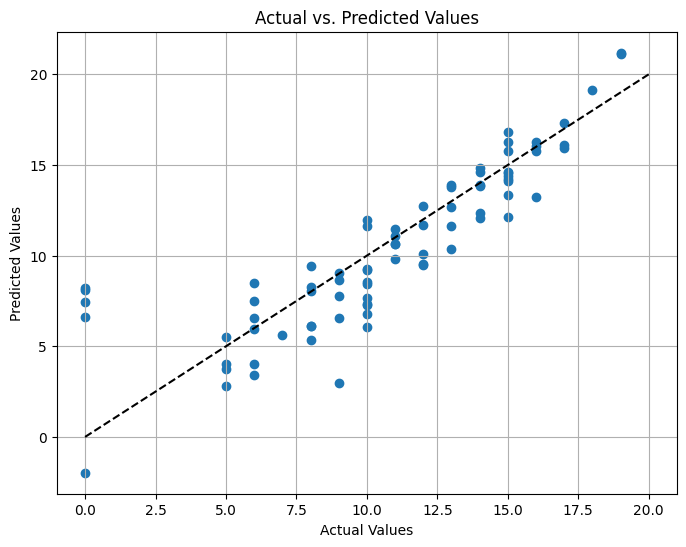

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)
# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.7049198262119839


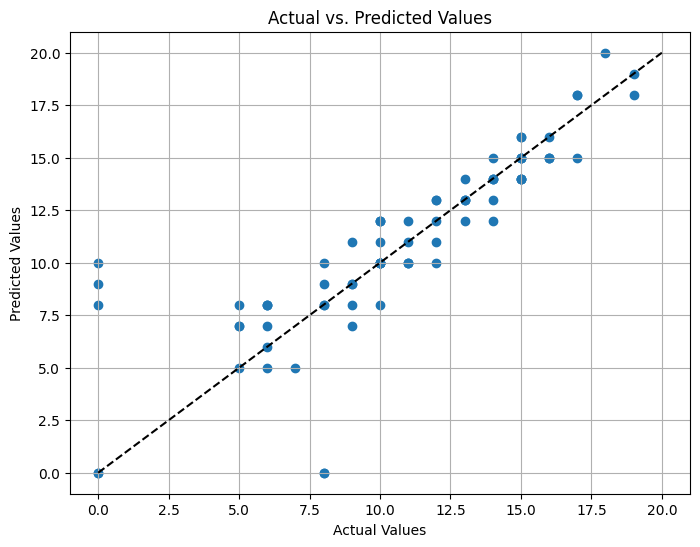

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and decision tree regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.8030574422529928


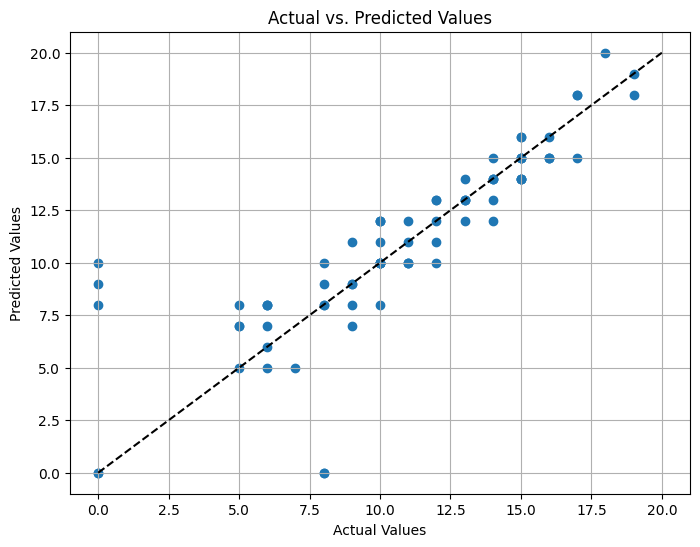

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and random forest regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.48299094968013045


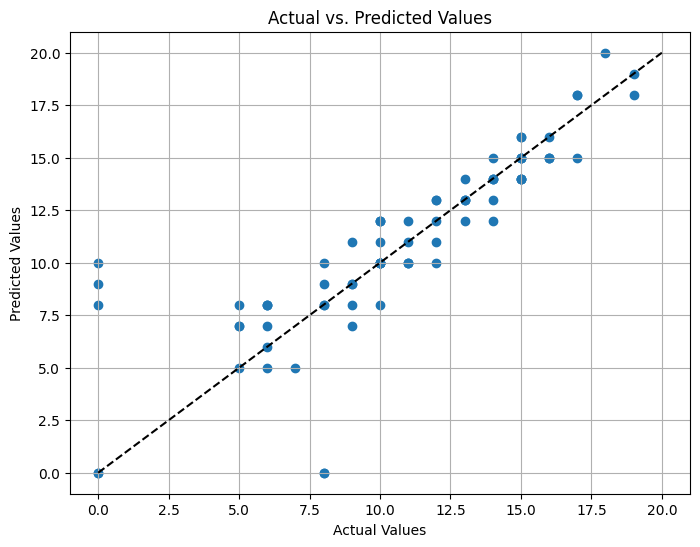

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and SVR model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", SVR())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.8256849994288413


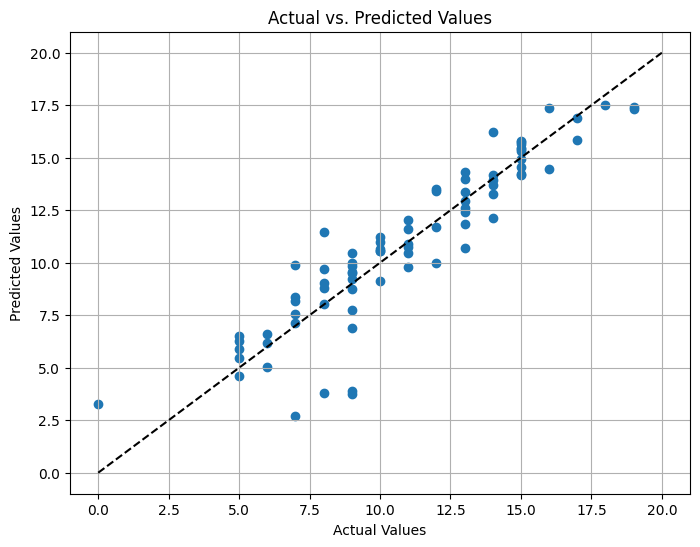

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)
# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.7510859046204399


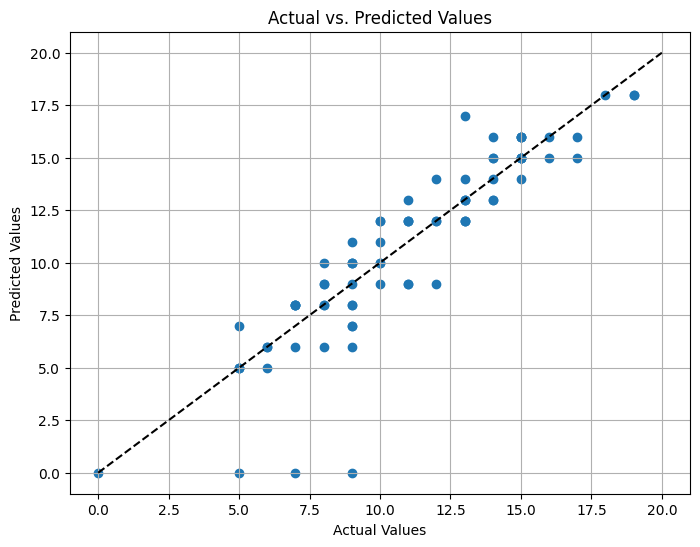

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and decision tree regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.8496128598114014


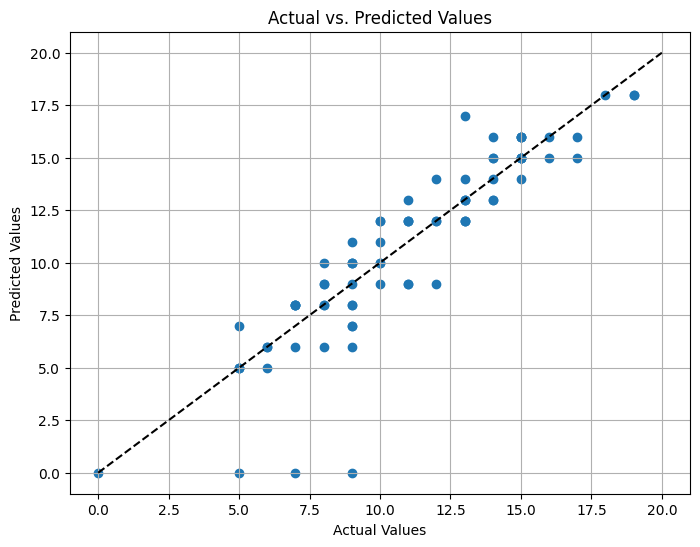

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and random forest regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.6107160905698781


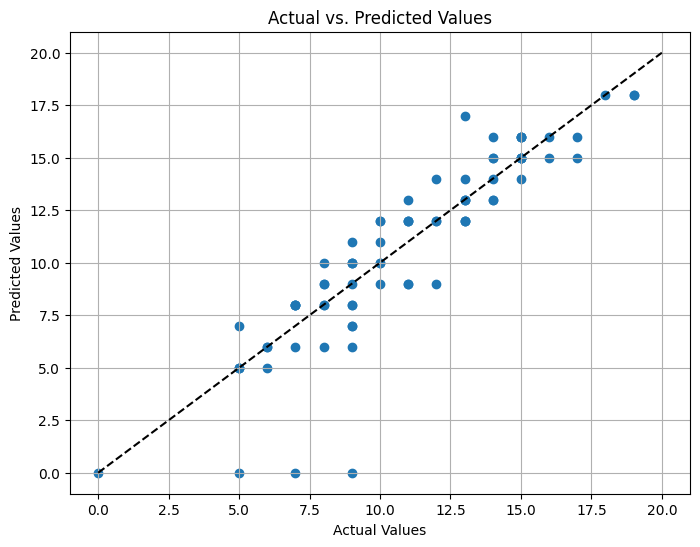

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and SVR model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", SVR())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.7236000204935757


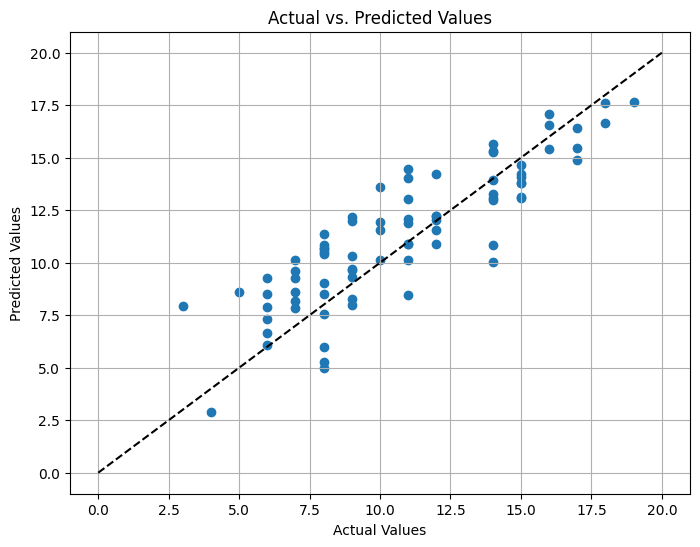

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)
# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


mean squared error: 0.5741339708432946


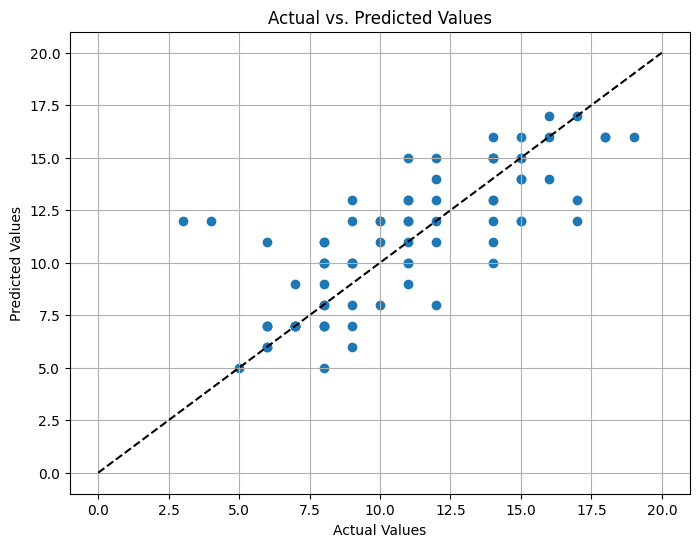

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and decision tree regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.8154027223081611


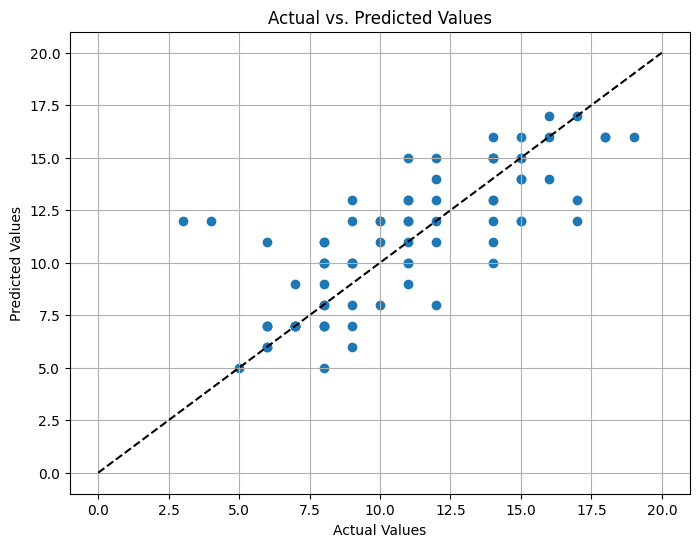

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and random forest regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.4836043331973562


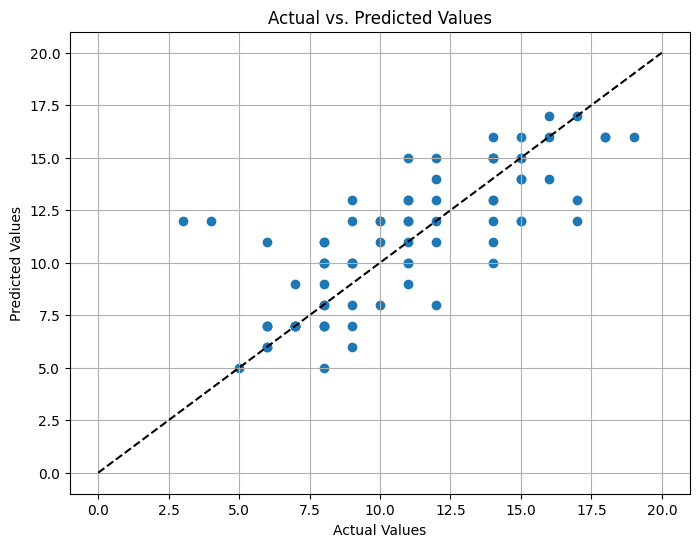

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-mat.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and SVR model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", SVR())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.8478881048971798


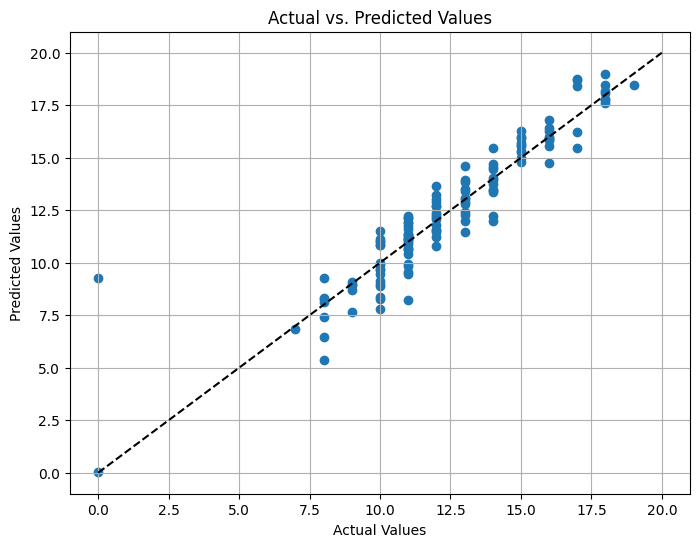

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)
# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.484903279046625


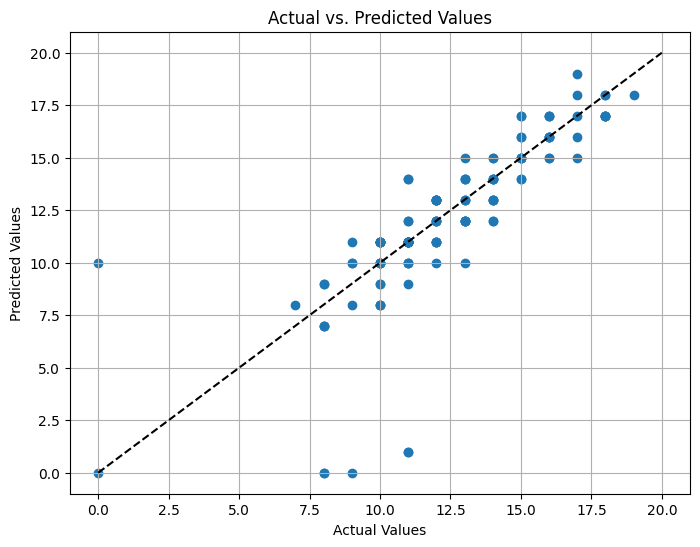

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and decision tree regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.8097626331885148


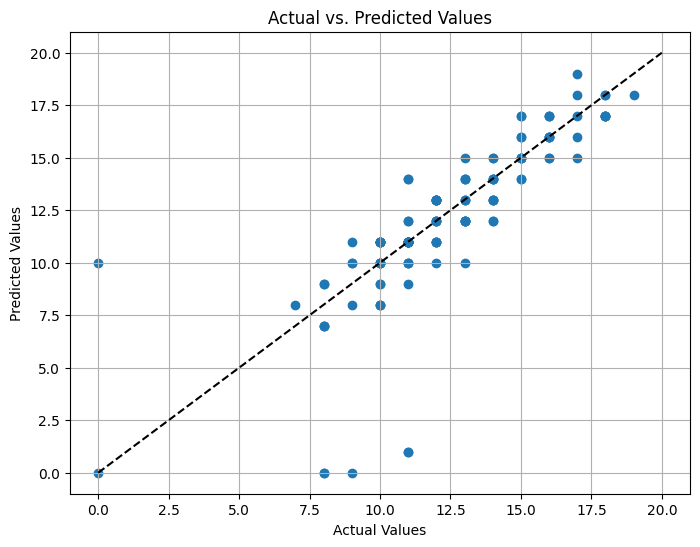

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and random forest regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.7406137539364209


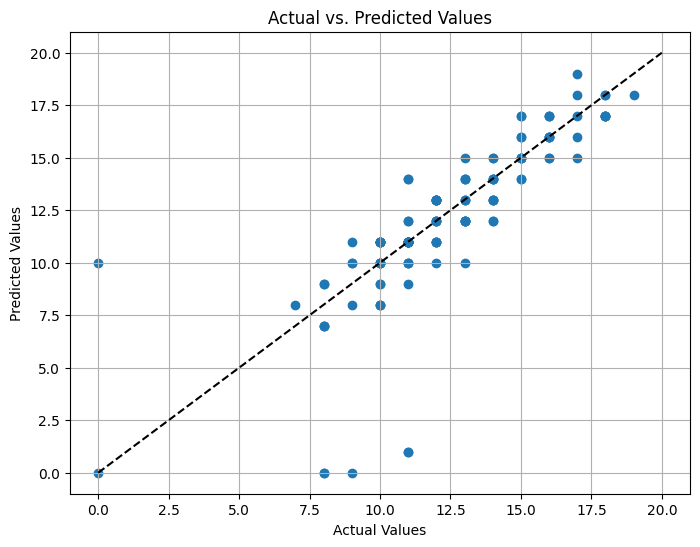

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G3"])  # Features
y = data["G3"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G2"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and SVR model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", SVR())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.8963438574392026


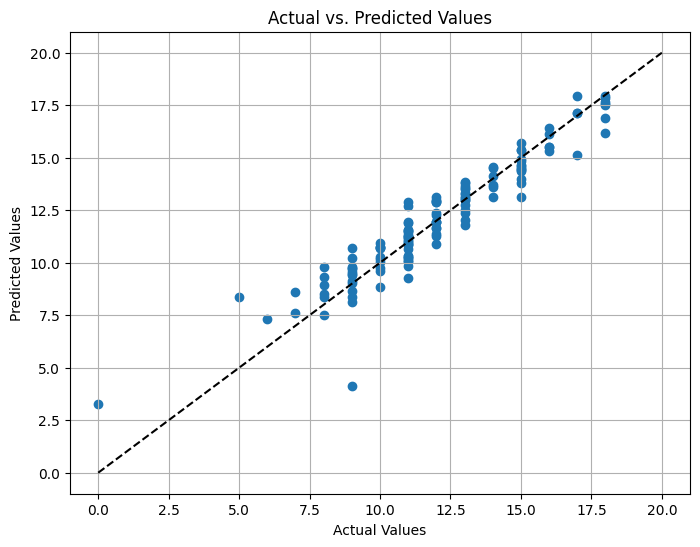

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)
# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.723069640227225


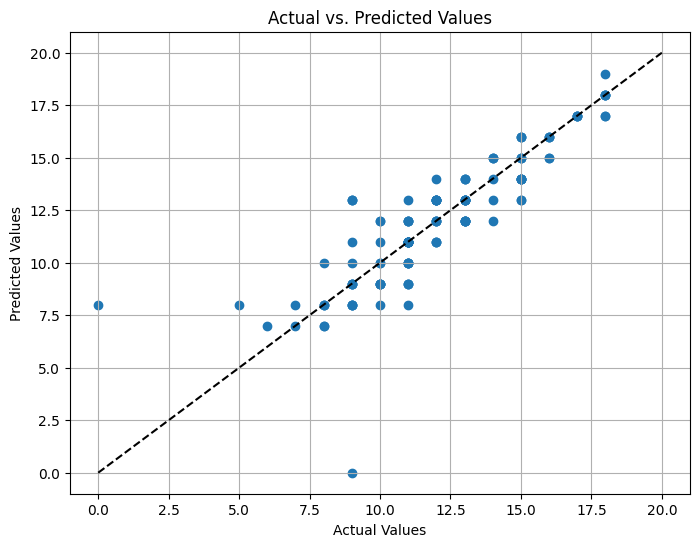

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and decision tree regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


mean squared error: 0.8705277916579003


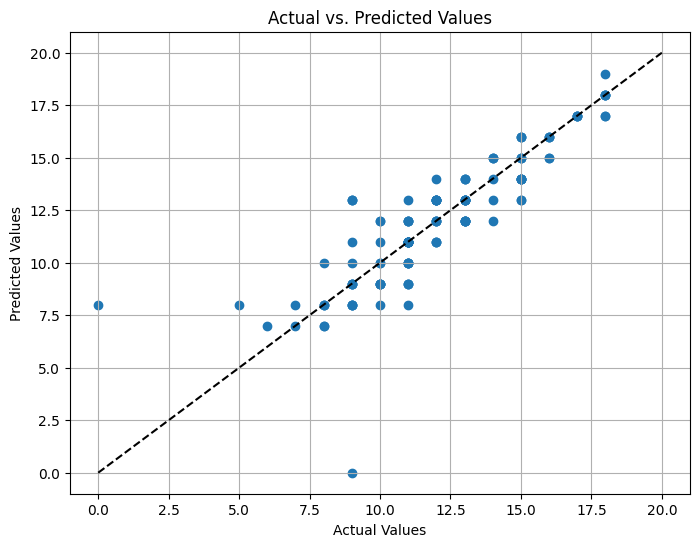

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and random forest regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.7507373896974102


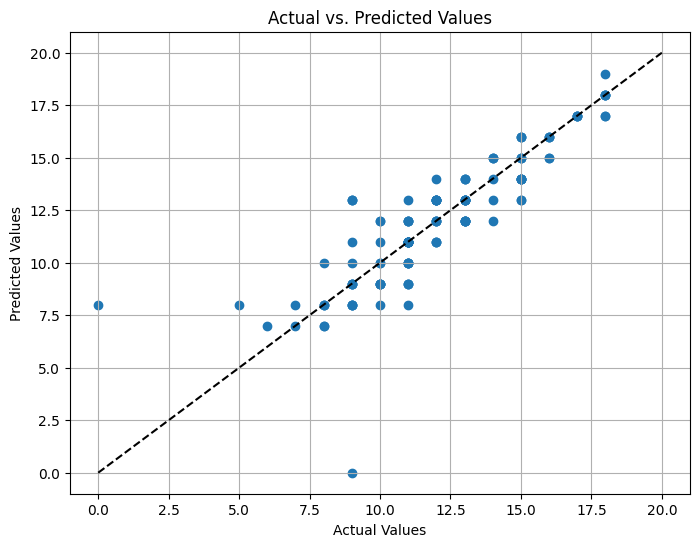

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G2"])  # Features
y = data["G2"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G1", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and SVR model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", SVR())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.7376654568531804


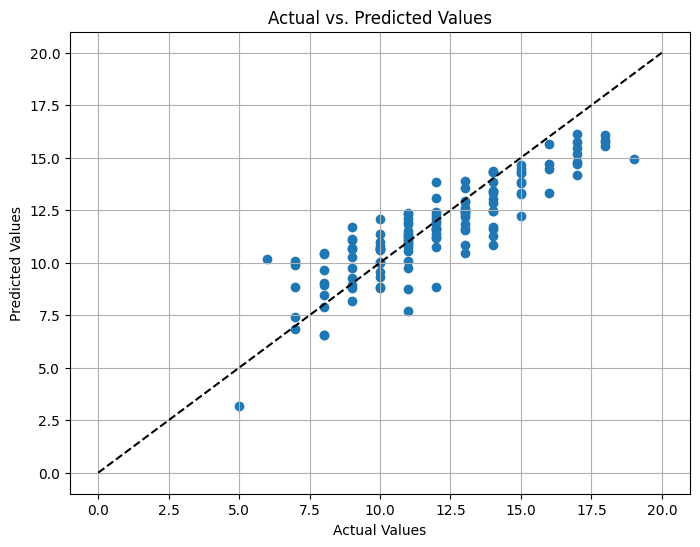

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)
# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.5913978494623655


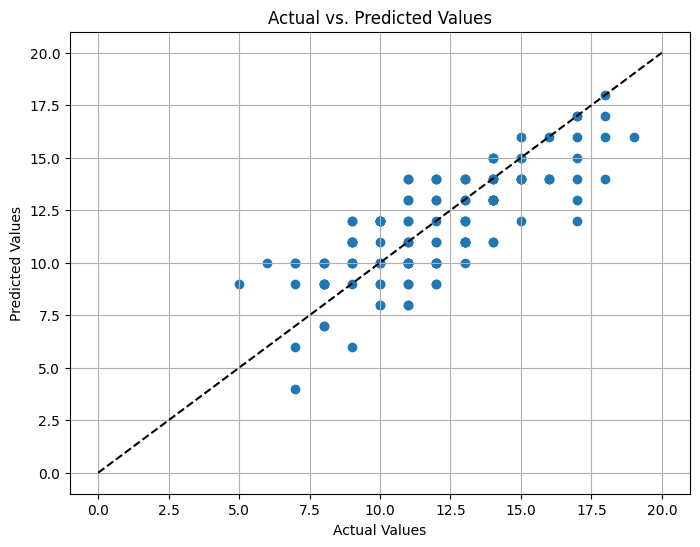

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and decision tree regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.7528879928315412


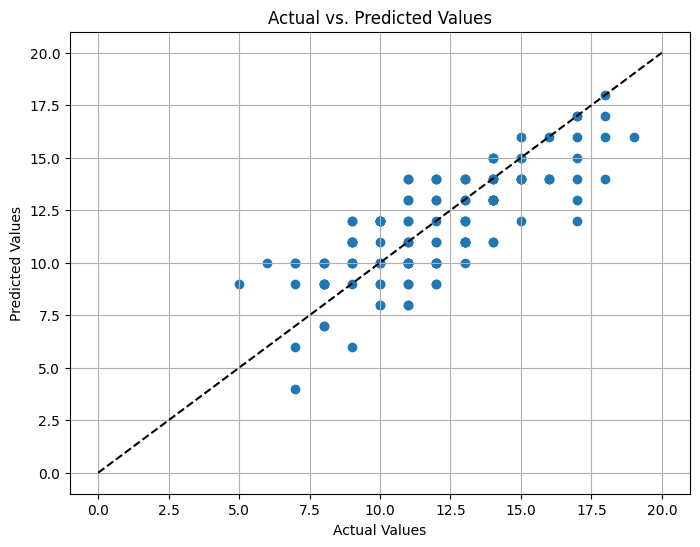

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and random forest regression model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

mean squared error: 0.6406929644251809


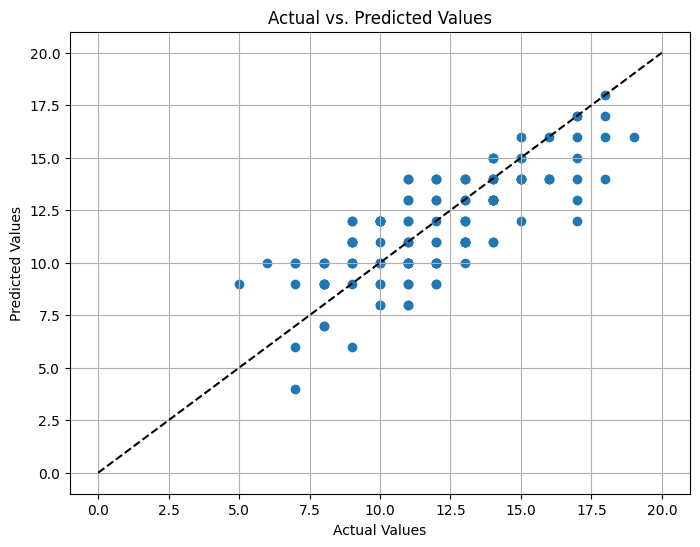

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming the dataset is stored in a CSV file named "student_data.csv"
data = pd.read_csv("student-por.csv", delimiter=";")

# Separate features (independent variables) and target variable
X = data.drop(columns=["G1"])  # Features
y = data["G1"]  # Target variable

# Identify ordinal and nominal categorical variables
ordinal_vars = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "G2", "G3"]
nominal_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup",
                "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), nominal_vars),
        ("scaler", StandardScaler(), ordinal_vars)  # Standardize ordinal variables
    ],
    remainder="passthrough"
)

# Create a pipeline with preprocessing and SVR model
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", SVR())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
mse = pipeline.score(X_test, y_test)
print("mean squared error:", mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([0, 20], [0, 20], '--k')  # Adding a diagonal line for reference (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()